Tentando ler o arquivo 'dados.txt'...
Ignorando linha mal formatada (partes != 3): '.31 1.69'
Leitura concluída. 60 pontos de dados encontrados.


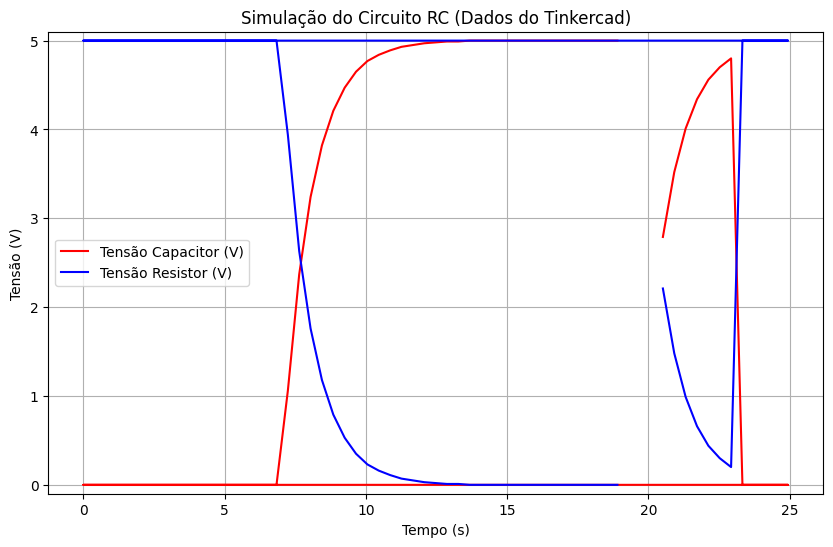

In [10]:
import matplotlib.pyplot as plt

# --- CONFIGURAÇÕES ---
# O nome do arquivo que você criou com os dados copiados do Tinkercad
NOME_DO_ARQUIVO = 'dados.txt'
# ---------------------

# Listas para armazenar os dados de cada coluna
tempos = []
tensoes_resistor = []
tensoes_capacitor = []

print(f"Tentando ler o arquivo '{NOME_DO_ARQUIVO}'...")

try:
    # 'with open' abre e fecha o arquivo automaticamente
    with open(NOME_DO_ARQUIVO, 'r') as f:
        # Lê o arquivo linha por linha
        for linha in f:
            # .strip() remove espaços em branco e quebras de linha
            linha_limpa = linha.strip()
            
            # Ignora linhas em branco
            if not linha_limpa:
                continue

            try:
                # 1. Divide a linha nos espaços
                # Ex: "1234 2.51 2.49" vira ['1234', '2.51', '2.49']
                parts = linha_limpa.split(' ')
                
                # 2. Verifica se temos exatamente 3 partes
                if len(parts) == 3:
                    # 3. Converte para float e adiciona às listas
                    # Converte o tempo de milissegundos para segundos
                    tempos.append(float(parts[0]) / 1000.0) 
                    tensoes_resistor.append(float(parts[1]))
                    tensoes_capacitor.append(float(parts[2]))
                else:
                    print(f"Ignorando linha mal formatada (partes != 3): '{linha_limpa}'")

            except (ValueError, TypeError):
                # Isso acontece se a linha tiver texto (ex: "Iniciando...")
                # ou se o número usar vírgula em vez de ponto
                print(f"Ignorando linha não-numérica: '{linha_limpa}'")

    print(f"Leitura concluída. {len(tempos)} pontos de dados encontrados.")
    
    # --- Se encontramos dados, vamos plotar ---
    if tempos:
        plt.figure(figsize=(10, 6)) # Cria uma figura com um bom tamanho
        
        # Plota os dados do capacitor (vermelho)
        plt.plot(tempos, tensoes_capacitor, 'r-', label='Tensão Capacitor (V)')
        
        # Plota os dados do resistor (azul)
        plt.plot(tempos, tensoes_resistor, 'b-', label='Tensão Resistor (V)')
        
        # Configurações do gráfico
        plt.title('Simulação do Circuito RC (Dados do Tinkercad)')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Tensão (V)')
        plt.legend() # Mostra a legenda
        plt.grid(True) # Adiciona uma grade
        
        # Define os limites do eixo Y para 0V a 5V (ou um pouco mais)
        plt.ylim(-0.1, 5.1)
        
        # Mostra o gráfico
        plt.show()
    else:
        print("Nenhum dado válido foi encontrado no arquivo. O gráfico não será gerado.")

except FileNotFoundError:
    print(f"Erro: Arquivo '{NOME_DO_ARQUIVO}' não encontrado.")
    print("Verifique se o nome do arquivo está correto e se ele está na mesma pasta do script Python.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")